1)

- Take a bunch of zip files from one folder
- unzip and rename them into two folders (name: date,time,copyrightholder.)
    - one for images with IPTC (w_IPTC)
    - one for images without IPTC (no_IPTC)
    
2)
- Reiterate through IPTC images getting date and location.
- Also get first and last time for said date to remove "transport" images. (see if that solves it..)
- Now, for each 'i' in w_IPTC  reiterate through each 'j' in no_IPTC matching on date and interpolating locale if time is between first and last in w_IPCT.

....

# Packagers and dirs

In [1]:
import os
import cv2
from iptcinfo3 import IPTCInfo
from PIL import Image
import re
import zipfile
import shutil
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# Windows location:
win_dir = '/mnt/c/Users/xpn381/Documents/data/new_pics/zip/'

# linux location:
linux_dir = '/home/xpn381/data/johan_test2/'

# Extract all zip files:

In [3]:
def mk_linux_dir(linux_dir): # fits in the function extract_from_win()
    # create new folder 
    if not os.path.exists(linux_dir):
        os.mkdir(linux_dir) # makes new dir                     
        
    # Or REPLACE old if exist
    else:
        shutil.rmtree(linux_dir) # delets dir and content.. FOREVER!
        os.mkdir(linux_dir) # makes new dir


In [4]:
def count_zips(win_dir): # fits in the function extract_from_win()
    
    count = 0
    
    for i, file in enumerate(os.listdir(win_dir)): # you don't use i; remove it..
        if file[-4:] == '.zip': # -4 captures the .zip
        
            count += 1
        
    return(count)

In [5]:
def extract_from_win(win_dir, linux_dir):
    
    print('starting extracting...')
    
    counter = 0
    
    mk_linux_dir(linux_dir) # function creating the folder in linux
    n = count_zips(win_dir) # function counting the .zip files.
    
    for file in os.listdir(win_dir): #small problem since you are also counter the files that are not zip.. here no. 0..
        if file[-4:] == '.zip': # -4 captures the .zip
            
            counter +=1
            
            print(f'extracting {counter} of {n} .zip files', end= '\r')
          
            # unzip file from win_dir to linux_dir
            with zipfile.ZipFile(win_dir + file,"r") as zip_ref:
                zip_ref.extractall(linux_dir+file[:-4])
                
    print('\ndone extracting...')

In [6]:
# extract_from_win(win_dir, linux_dir)

# Sort files into new folders

In [7]:
def count_files(linux_dir): # fits in the function flatten_dirs()
    
    count = 0
    
    for root, dirs, files in os.walk(linux_dir):
        for name in files:
            count += 1
        
    return(count)

In [8]:
def remove_extracted_folders(linux_dir, win_dir):

    print('\nstarts removing old zip folders...')
    
    counter = 0
    n = count_zips(win_dir) # you akready used this on tim.. inefficient.
    
    #for root, dirs, files in os.walk(linux_dir):
    for file in os.listdir(linux_dir): # you don't use i; remove it..
        #print(file)
        
        
        if os.path.isdir(linux_dir+file):
            shutil.rmtree(linux_dir+file)
            counter +=1
            
            print(f'removed {counter} of {n} old zip folders', end= '\r')
            
        else:
            pass
    
    print('\ndone removing...')

In [9]:
def flatten_dirs(linux_dir, win_dir):
    
    extract_from_win(win_dir, linux_dir)
    
    counter = 0
    
    print('\nstarts moving filese to shared parent dir...')
    
    files_count = count_files(linux_dir)
    
    for root, dirs, files in os.walk(linux_dir):
        
        for name in files:
            
            counter += 1
            print(f'moving file {counter} of {files_count}', end= '\r')
            
            stamp = str(time.time()).replace('.','') # so rigt now I don't handle dublicates... or replaces anything... I just keep filling the folder.
            
            old_path = os.path.join(root, name)
            new_path = linux_dir + stamp + name
            
            # Moving day..
            shutil.move(old_path, new_path)
    
    print('\ndone moving files to parent dir..\n')
    # Remove the unzipped folders.
    remove_extracted_folders(linux_dir, win_dir)
    print('\nALL DONE!')
    
flatten_dirs(linux_dir, win_dir)

starting extracting...
extracting 4 of 4 .zip files
done extracting...

starts moving filese to shared parent dir...
moving file 1505 of 1505
done moving files to parent dir..


starts removing old zip folders...
removed 4 of 4 old zip folders
done removing...

ALL DONE!


# Check some of the images:

In [10]:
def image_check(linux_dir, n_images):

    files_count = count_files(linux_dir)
    random_imgs = np.random.randint(0,files_count, n_images)
    print(f'printing {n_images} random images..')

    for i in random_imgs:
        img = os.listdir(linux_dir)[i]

        img_array = cv2.imread(os.path.join(linux_dir, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)

        plt.show()

    print('DONE')

printing 4 random images..


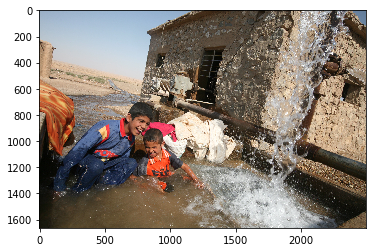

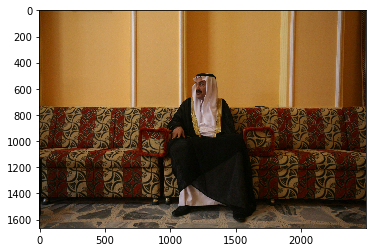

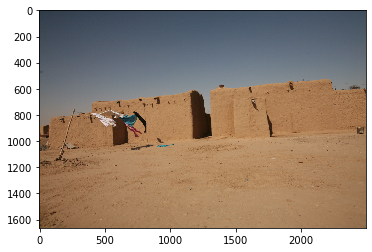

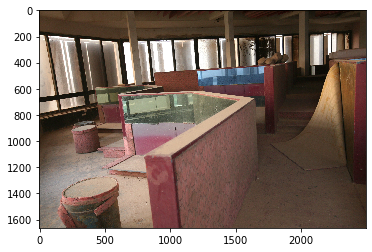

DONE


In [13]:
image_check(linux_dir, 4)

In [14]:
print('Apparently everything is in order..')

Apparently everything is in order..


**Men kan det passe at der er 1500 billeder?**  
Ja, men du har mpske også downloaded en mappe to gange og derer nok dubletter en mass...